# Finding the K value in KNN

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataet

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# dependent and independent dataset

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values


In [4]:
# split data into train test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 0)

In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Here we don't know exact no. of neigbors so initially we will start with k = 1

In [6]:
# fitting KNN to train set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [7]:
# predict the test set
y_pred = classifier.predict(X_test)

In [8]:
# evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[61  7]
 [ 6 26]]
0.87


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.79      0.81      0.80        32

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



# chosing the k values

### Using accuracy_rate find out  optimum NO. of K value

In [10]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(estimator = knn , X = X_train, y = y_train, cv = 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy Rate')

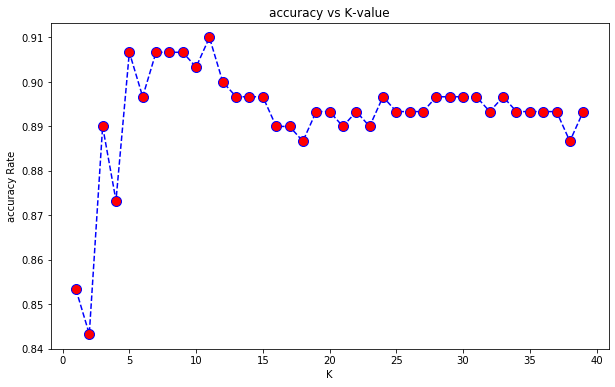

In [11]:
# plotting 
plt.figure(figsize =(10,6))
plt.plot(range(1,40), accuracy_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('accuracy vs K-value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

### Using error_rate find out optimum NO. of K value¶

In [12]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.predict(X_test)
    error_rate.append(1-score.mean())

In [13]:
# or we can use this way to find out  the error_rate

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)  
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

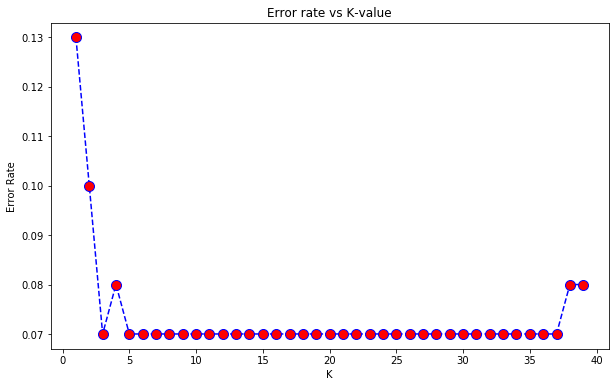

In [14]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')